In [1]:
from IPython.display import clear_output
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
os.chdir('/home/vco/Projects/pm4py-dcr') # working directory should be pm4py-dcr (the one behind notebooks)
print(os.getcwd())

/home/vco/Projects/pm4py-dcr/notebooks
/home/vco/Projects/pm4py-dcr


In [29]:
import pm4py
import pandas as pd
from copy import deepcopy
from pm4py.algo.discovery.dcr_discover import algorithm as alg
from pm4py.objects.dcr.exporter import exporter as dcr_exporter

# Meaning of prefix letters:
* A = Application
* O = Offer
* W = Workflow

# BPIC 12

In [44]:
bpic12 = pm4py.read_xes('/home/vco/Datasets/BPI_Challenge_2012.xes')
bpic12['case:AMOUNT_REQ'] = pd.to_numeric(bpic12['case:AMOUNT_REQ'])
bpic12['concept:name'].replace({'W_Completeren aanvraag':'W_Add information to application',
 'W_Nabellen offertes':'W_Follow up by phone on quotes',
 'W_Valideren aanvraag':'W_Validate application',
 'W_Wijzigen contractgegevens':'W_Change contract details',
 'W_Afhandelen leads':'W_Follow up on leads',
 'W_Nabellen incomplete dossiers':'W_Follow up by phone on incomplete case files',
 'W_Beoordelen fraude':'W_Assess fraud'},inplace=True)
bpic12['EventOrigin'] = bpic12['concept:name'].apply(lambda x: str(x).split('_')[0])

In [43]:
cancelled_cids = set(bpic12[(bpic12['lifecycle:transition']=='COMPLETE')&(bpic12['concept:name']=='A_CANCELLED')]['case:concept:name'].unique())

In [45]:
only_offer_cids = set(bpic12[bpic12['EventOrigin']=='O']['case:concept:name'].unique())

In [46]:
cancelled_no_offer_cids = cancelled_cids.difference(only_offer_cids)

In [47]:
cancelled_bpic12 = bpic12[bpic12['case:concept:name'].isin(cancelled_no_offer_cids)]

In [50]:
bpic12[(bpic12['EventOrigin']=='A')&(bpic12['lifecycle:transition']!='COMPLETE')]

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ,EventOrigin


In [49]:
bpic12_lct = deepcopy(cancelled_bpic12)
bpic12_lct['concept:name'] = bpic12_lct['concept:name'] + "_" + bpic12_lct['lifecycle:transition']
pm4py.write_xes(bpic12_lct[bpic12_lct['lifecycle:transition']!='SCHEDULE'], file_path='datasets/bpic12_no_schedule_lct_cancelled')

exporting log, completed traces :: 100%|██████████| 1167/1167 [00:00<00:00, 3054.25it/s]


In [34]:
bpic12_lct = deepcopy(bpic12)
bpic12_lct['concept:name'] = bpic12_lct['concept:name'] + "_" + bpic12_lct['lifecycle:transition']
pm4py.write_xes(bpic12_lct[bpic12_lct['lifecycle:transition']!='SCHEDULE'], file_path='datasets/bpic12_no_schedule_lct')

exporting log, completed traces :: 100%|██████████| 13087/13087 [00:03<00:00, 3445.30it/s]


In [23]:
bpic12_only_complete = bpic12[bpic12['lifecycle:transition']=='COMPLETE']

In [24]:
pm4py.write_xes(bpic12_only_complete, file_path='datasets/bpic12_only_complete')

exporting log, completed traces :: 100%|██████████| 13087/13087 [00:03<00:00, 4310.40it/s]


In [25]:
pm4py.write_xes(bpic12[(bpic12['EventOrigin']=='O')|(bpic12['EventOrigin']=='W')],file_path='datasets/bpic12_wo')

exporting log, completed traces :: 100%|██████████| 9658/9658 [00:03<00:00, 2455.68it/s]


In [121]:
bpic12 = pm4py.read_xes('/home/vco/Datasets/BPI_Challenge_2012.xes')
bpic12['EventOrigin'] = bpic12['concept:name'].apply(lambda x: str(x).split('_')[0])
bpic12['concept:name'] = bpic12['concept:name'].apply(lambda x: str(x).split('_')[1])
bpic12['case:AMOUNT_REQ'] = pd.to_numeric(bpic12['case:AMOUNT_REQ'])

parsing log, completed traces :: 100%|██████████| 13087/13087 [00:05<00:00, 2206.49it/s]


In [122]:
pm4py.write_xes(bpic12[bpic12['EventOrigin']=='A'],file_path='datasets/bpic12_application')
pm4py.write_xes(bpic12[bpic12['EventOrigin']=='O'],file_path='datasets/bpic12_offer')
pm4py.write_xes(bpic12[bpic12['EventOrigin']=='W'],file_path='datasets/bpic12_workflow')
pm4py.write_xes(bpic12,file_path='datasets/bpic12_all')

exporting log, completed traces :: 100%|██████████| 13087/13087 [00:05<00:00, 2572.36it/s]


<Axes: >

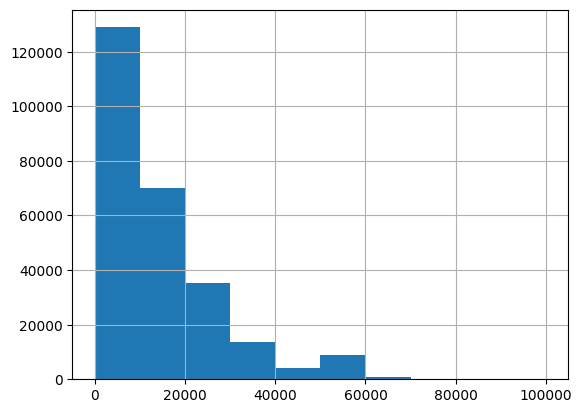

In [56]:
bpic12[bpic12['case:AMOUNT_REQ']>0]['case:AMOUNT_REQ'].hist()

In [83]:
accepted_offers = set(bpic12[(bpic12['concept:name']=='ACCEPTED') & (bpic12['EventOrigin']=='O')]['case:concept:name'].unique())
declined_offers = set(bpic12[(bpic12['concept:name']=='DECLINED') & (bpic12['EventOrigin']=='O')]['case:concept:name'].unique())
check_this = set(bpic12['case:concept:name'].unique()).difference(accepted_offers.union(declined_offers))
bpic12[(bpic12['case:concept:name'].isin(check_this)) & (bpic12['concept:name'].isin(['ACCEPTED','DECLINED']))].sort_values(['case:concept:name','time:timestamp'],ascending=True)[['case:concept:name','concept:name','EventOrigin']]

,case:concept:name,concept:name,EventOrigin
126,173697,DECLINED,A
129,173700,DECLINED,A
151,173706,DECLINED,A
333,173724,DECLINED,A
337,173727,DECLINED,A
...,...,...,...
262146,214364,ACCEPTED,A
262170,214367,DECLINED,A
262175,214370,DECLINED,A
262185,214373,ACCEPTED,A


In [111]:
bpic12_eo = bpic12[['case:concept:name','EventOrigin','time:timestamp','lifecycle:transition']].sort_values(['case:concept:name','EventOrigin'])
bpic12_eo.rename({'EventOrigin':'concept:name'},axis=1,inplace=True)
dcr_eo1, la = alg.apply(bpic12_eo, alg.DCR_BASIC,timed=True)
dcr_exporter.apply(dcr_eo1,path="models/bpi12_event_origin.xml",dcr_title="",dcr_description="")

/home/vco/Projects/pm4py-dcr/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [112]:
bpic12[bpic12['case:concept:name']=='173688'].sort_values('time:timestamp', ascending=True)[['concept:name','EventOrigin','org:resource','lifecycle:transition','time:timestamp']]

,concept:name,EventOrigin,org:resource,lifecycle:transition,time:timestamp
0,SUBMITTED,A,112,COMPLETE,2011-09-30 22:38:44.546000+00:00
1,PARTLYSUBMITTED,A,112,COMPLETE,2011-09-30 22:38:44.880000+00:00
2,PREACCEPTED,A,112,COMPLETE,2011-09-30 22:39:37.906000+00:00
3,Completeren aanvraag,W,112,SCHEDULE,2011-09-30 22:39:38.875000+00:00
4,Completeren aanvraag,W,NaN,START,2011-10-01 09:36:46.437000+00:00
5,ACCEPTED,A,10862,COMPLETE,2011-10-01 09:42:43.308000+00:00
6,SELECTED,O,10862,COMPLETE,2011-10-01 09:45:09.243000+00:00
7,FINALIZED,A,10862,COMPLETE,2011-10-01 09:45:09.243000+00:00
8,CREATED,O,10862,COMPLETE,2011-10-01 09:45:11.197000+00:00
9,SENT,O,10862,COMPLETE,2011-10-01 09:45:11.380000+00:00


In [58]:
bpic12[['EventOrigin','org:resource','concept:name']].groupby(['EventOrigin','org:resource','concept:name']).all()

Empty DataFrame
Columns: []
Index: [(A, 10138, ACCEPTED), (A, 10138, ACTIVATED), (A, 10138, APPROVED), (A, 10138, CANCELLED), (A, 10138, DECLINED), (A, 10138, FINALIZED), (A, 10138, PREACCEPTED), (A, 10138, REGISTERED), (A, 10188, DECLINED), (A, 10228, ACCEPTED), (A, 10228, CANCELLED), (A, 10228, DECLINED), (A, 10228, FINALIZED), (A, 10228, PREACCEPTED), (A, 10609, ACCEPTED), (A, 10609, ACTIVATED), (A, 10609, APPROVED), (A, 10609, CANCELLED), (A, 10609, DECLINED), (A, 10609, FINALIZED), (A, 10609, PREACCEPTED), (A, 10609, REGISTERED), (A, 10629, ACCEPTED), (A, 10629, ACTIVATED), (A, 10629, APPROVED), (A, 10629, CANCELLED), (A, 10629, DECLINED), (A, 10629, FINALIZED), (A, 10629, PREACCEPTED), (A, 10629, REGISTERED), (A, 10779, ACCEPTED), (A, 10779, ACTIVATED), (A, 10779, APPROVED), (A, 10779, CANCELLED), (A, 10779, DECLINED), (A, 10779, FINALIZED), (A, 10779, REGISTERED), (A, 10789, CANCELLED), (A, 10809, ACCEPTED), (A, 10809, ACTIVATED), (A, 10809, APPROVED), (A, 10809, CANCELLED), (A, 10809, DECLINED), (A, 10809, FINALIZED), (A, 10809, PREACCEPTED), (A, 10809, REGISTERED), (A, 10859, ACCEPTED), (A, 10859, CANCELLED), (A, 10859, DECLINED), (A, 10859, FINALIZED), (A, 10859, PREACCEPTED), (A, 10861, ACCEPTED), (A, 10861, CANCELLED), (A, 10861, DECLINED), (A, 10861, FINALIZED), (A, 10861, PREACCEPTED), (A, 10862, ACCEPTED), (A, 10862, CANCELLED), (A, 10862, DECLINED), (A, 10862, FINALIZED), (A, 10862, PREACCEPTED), (A, 10863, ACCEPTED), (A, 10863, CANCELLED), (A, 10863, DECLINED), (A, 10863, FINALIZED), (A, 10863, PREACCEPTED), (A, 10880, ACCEPTED), (A, 10880, CANCELLED), (A, 10880, DECLINED), (A, 10880, FINALIZED), (A, 10880, PREACCEPTED), (A, 10881, ACCEPTED), (A, 10881, CANCELLED), (A, 10881, DECLINED), (A, 10881, FINALIZED), (A, 10881, PREACCEPTED), (A, 10889, ACCEPTED), (A, 10889, CANCELLED), (A, 10889, DECLINED), (A, 10889, FINALIZED), (A, 10889, PREACCEPTED), (A, 10899, CANCELLED), (A, 10909, ACCEPTED), (A, 10909, CANCELLED), (A, 10909, DECLINED), (A, 10909, FINALIZED), (A, 10909, PREACCEPTED), (A, 10910, ACCEPTED), (A, 10910, CANCELLED), (A, 10910, DECLINED), (A, 10910, FINALIZED), (A, 10910, PREACCEPTED), (A, 10912, ACCEPTED), (A, 10912, CANCELLED), (A, 10912, DECLINED), (A, 10912, FINALIZED), (A, 10912, PREACCEPTED), (A, 10913, ACCEPTED), (A, 10913, CANCELLED), (A, 10913, DECLINED), ...]

[871 rows x 0 columns]

# BPIC 12 TKDE (seems to be the same as BPIC 12)

In [36]:
tkde_bpic12 = pm4py.read_xes('/home/vco/Datasets/data/TKDE_Benchmark/BPIC12.xes')

parsing log, completed traces :: 100%|██████████| 13087/13087 [00:06<00:00, 1907.18it/s]


# BPIC 17

In [16]:
bpic17 = pm4py.read_xes('/home/vco/Datasets/BPI Challenge 2017.xes')
print(bpic17['EventOrigin'].unique())
pm4py.write_xes(bpic17[bpic17['EventOrigin']=='Application'],file_path='datasets/bpic17_application')
pm4py.write_xes(bpic17[bpic17['EventOrigin']=='Offer'],file_path='datasets/bpic17_offer')
pm4py.write_xes(bpic17[bpic17['EventOrigin']=='Workflow'],file_path='datasets/bpic17_workflow')
pm4py.write_xes(bpic17,file_path='datasets/bpic17_all')

array(['Application', 'Workflow', 'Offer'], dtype=object)

In [23]:
bpic17[['EventOrigin','org:resource','concept:name']].groupby(['EventOrigin','org:resource','concept:name']).first()

Empty DataFrame
Columns: []
Index: [(Application, User_1, A_Cancelled), (Application, User_1, A_Concept), (Application, User_1, A_Create Application), (Application, User_1, A_Submitted), (Application, User_10, A_Accepted), (Application, User_10, A_Cancelled), (Application, User_10, A_Complete), (Application, User_10, A_Concept), (Application, User_10, A_Create Application), (Application, User_10, A_Denied), (Application, User_10, A_Incomplete), (Application, User_10, A_Validating), (Application, User_100, A_Accepted), (Application, User_100, A_Complete), (Application, User_100, A_Concept), (Application, User_100, A_Create Application), (Application, User_100, A_Denied), (Application, User_100, A_Incomplete), (Application, User_100, A_Pending), (Application, User_100, A_Validating), (Application, User_101, A_Accepted), (Application, User_101, A_Complete), (Application, User_101, A_Concept), (Application, User_101, A_Create Application), (Application, User_101, A_Denied), (Application, User_101, A_Incomplete), (Application, User_101, A_Validating), (Application, User_102, A_Accepted), (Application, User_102, A_Cancelled), (Application, User_102, A_Complete), (Application, User_102, A_Concept), (Application, User_102, A_Create Application), (Application, User_102, A_Denied), (Application, User_102, A_Incomplete), (Application, User_102, A_Pending), (Application, User_102, A_Validating), (Application, User_103, A_Accepted), (Application, User_103, A_Cancelled), (Application, User_103, A_Complete), (Application, User_103, A_Concept), (Application, User_103, A_Create Application), (Application, User_103, A_Validating), (Application, User_104, A_Accepted), (Application, User_104, A_Cancelled), (Application, User_104, A_Complete), (Application, User_104, A_Concept), (Application, User_104, A_Create Application), (Application, User_105, A_Accepted), (Application, User_105, A_Cancelled), (Application, User_105, A_Complete), (Application, User_105, A_Concept), (Application, User_105, A_Create Application), (Application, User_105, A_Incomplete), (Application, User_105, A_Validating), (Application, User_106, A_Accepted), (Application, User_106, A_Complete), (Application, User_106, A_Concept), (Application, User_106, A_Create Application), (Application, User_106, A_Denied), (Application, User_106, A_Incomplete), (Application, User_106, A_Pending), (Application, User_106, A_Validating), (Application, User_107, A_Accepted), (Application, User_107, A_Cancelled), (Application, User_107, A_Complete), (Application, User_107, A_Concept), (Application, User_107, A_Create Application), (Application, User_107, A_Denied), (Application, User_107, A_Incomplete), (Application, User_107, A_Pending), (Application, User_107, A_Validating), (Application, User_108, A_Accepted), (Application, User_108, A_Complete), (Application, User_108, A_Concept), (Application, User_108, A_Create Application), (Application, User_109, A_Accepted), (Application, User_109, A_Cancelled), (Application, User_109, A_Complete), (Application, User_109, A_Concept), (Application, User_109, A_Create Application), (Application, User_109, A_Denied), (Application, User_109, A_Incomplete), (Application, User_109, A_Pending), (Application, User_109, A_Validating), (Application, User_11, A_Accepted), (Application, User_11, A_Cancelled), (Application, User_11, A_Complete), (Application, User_11, A_Concept), (Application, User_11, A_Create Application), (Application, User_11, A_Denied), (Application, User_11, A_Incomplete), (Application, User_11, A_Validating), (Application, User_110, A_Accepted), (Application, User_110, A_Cancelled), (Application, User_110, A_Complete), (Application, User_110, A_Concept), (Application, User_110, A_Create Application), (Application, User_111, A_Accepted), (Application, User_111, A_Cancelled), (Application, User_111, A_Complete), ...]

[2414 rows x 0 columns]

# BPIC 17 - Just the Offers (Offer log)

In [17]:
bpic17_offer = pm4py.read_xes('/home/vco/Datasets/BPI Challenge 2017 - Offer log.xes')
print(bpic17_offer['EventOrigin'].unique())

array(['Offer'], dtype=object)

# BPIC 17 - f - TKDE - used by the imperative miners

In [18]:
bpic17_f = pm4py.read_xes('/home/vco/Datasets/data/TKDE_Benchmark/BPIC17_f.xes')
print(bpic17_f['EventOrigin'].unique())

array(['Application', 'Offer', 'Workflow'], dtype=object)

In [ ]:
accepted_offers = set(bpic12[(bpic12['concept:name']=='ACCEPTED') & (bpic12['EventOrigin']=='O')]['case:concept:name'].unique())
declined_offers = set(bpic12[(bpic12['concept:name']=='DECLINED') & (bpic12['EventOrigin']=='O')]['case:concept:name'].unique())
check_this = set(bpic12['case:concept:name'].unique()).difference(accepted_offers.union(declined_offers))
bpic12[(bpic12['case:concept:name'].isin(check_this)) & (bpic12['concept:name'].isin(['ACCEPTED','DECLINED']))].sort_values(['case:concept:name','time:timestamp'],ascending=True)[['case:concept:name','concept:name','EventOrigin']]

In [109]:
bpic17_eo = bpic17[['case:concept:name', 'EventOrigin', 'time:timestamp', 'lifecycle:transition']].sort_values(
    ['case:concept:name', 'EventOrigin'])
bpic17_eo.rename({'EventOrigin': 'concept:name'}, axis=1, inplace=True)
dcr_eo17, la17 = alg.apply(bpic17_eo, alg.DCR_BASIC,timed=True)
dcr_exporter.apply(dcr_eo17, path="models/bpi17_event_origin.xml", dcr_title="", dcr_description="")

/home/vco/Projects/pm4py-dcr/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
